# D77-1
* **將 Epoch 加到 500 個，並觀察 learning curve 的走勢**

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [13]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 19:01:43.776747 139980686804736 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 19:01:43.795205 139980686804736 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 19:02:21.440523 139980686804736 deprecation.py:323] From /home/rex/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 19:02:21.488516 139980686804736 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.9148 - acc: 0.3107 - val_loss: 1.7930 - val_acc: 0.3647
Epoch 2/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.7076 - acc: 0.3920 - val_loss: 1.7288 - val_acc: 0.3875
Epoch 3/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6122 - acc: 0.4244 - val_loss: 1.5858 - val_acc: 0.4352
Epoch 4/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.5461 - acc: 0.4484 - val_loss: 1.5090 - val_acc: 0.4642
Epoch 5/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.5075 - acc: 0.4646 - val_loss: 1.5314 - val_acc: 0.4515
Epoch 6/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.4655 - acc: 0.4772 - val_loss: 1.4763 - val_acc: 0.4758
Epoch 7/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4299 - acc: 0.4908 - val_loss: 1.

50000/50000 [==============================] - 6s 121us/step - loss: 0.5228 - acc: 0.8130 - val_loss: 2.0307 - val_acc: 0.5173
Epoch 60/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5107 - acc: 0.8177 - val_loss: 2.0865 - val_acc: 0.5206
Epoch 61/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.4932 - acc: 0.8249 - val_loss: 2.0763 - val_acc: 0.5126
Epoch 62/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.5031 - acc: 0.8210 - val_loss: 2.1982 - val_acc: 0.5106
Epoch 63/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.4760 - acc: 0.8292 - val_loss: 2.0930 - val_acc: 0.5130
Epoch 64/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.4814 - acc: 0.8267 - val_loss: 2.1642 - val_acc: 0.5122
Epoch 65/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.4591 - acc: 0.8355 - val_loss: 2.2744 - val_acc: 0.5130
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 111us/step - loss: 0.2397 - acc: 0.9144 - val_loss: 3.4323 - val_acc: 0.5015
Epoch 118/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.2001 - acc: 0.9294 - val_loss: 3.5219 - val_acc: 0.4978
Epoch 119/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.2380 - acc: 0.9141 - val_loss: 3.4391 - val_acc: 0.4946
Epoch 120/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2224 - acc: 0.9207 - val_loss: 3.5332 - val_acc: 0.4932
Epoch 121/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2594 - acc: 0.9073 - val_loss: 3.5345 - val_acc: 0.5032
Epoch 122/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.2165 - acc: 0.9221 - val_loss: 3.5335 - val_acc: 0.4973
Epoch 123/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.2413 - acc: 0.9130 - val_loss: 3.6304 - val_acc: 0.4926
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 112us/step - loss: 0.1278 - acc: 0.9547 - val_loss: 4.2373 - val_acc: 0.4914
Epoch 176/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1240 - acc: 0.9558 - val_loss: 4.2332 - val_acc: 0.4979
Epoch 177/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1352 - acc: 0.9517 - val_loss: 4.2264 - val_acc: 0.4959
Epoch 178/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2151 - acc: 0.9256 - val_loss: 4.2210 - val_acc: 0.4946
Epoch 179/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.2559 - acc: 0.9148 - val_loss: 4.0864 - val_acc: 0.4961
Epoch 180/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2005 - acc: 0.9310 - val_loss: 4.1884 - val_acc: 0.4949
Epoch 181/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1088 - acc: 0.9622 - val_loss: 4.2093 - val_acc: 0.4936
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.1503 - acc: 0.9468 - val_loss: 4.5775 - val_acc: 0.4928
Epoch 234/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1811 - acc: 0.9403 - val_loss: 4.5723 - val_acc: 0.4958
Epoch 235/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.1509 - acc: 0.9480 - val_loss: 4.5985 - val_acc: 0.4953
Epoch 236/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0952 - acc: 0.9671 - val_loss: 4.6053 - val_acc: 0.4993
Epoch 237/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1145 - acc: 0.9594 - val_loss: 4.6730 - val_acc: 0.4905
Epoch 238/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1682 - acc: 0.9424 - val_loss: 4.5903 - val_acc: 0.4912
Epoch 239/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1904 - acc: 0.9371 - val_loss: 4.6848 - val_acc: 0.4907
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.0402 - acc: 0.9863 - val_loss: 4.8820 - val_acc: 0.5007
Epoch 292/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1843 - acc: 0.9426 - val_loss: 4.8684 - val_acc: 0.4875
Epoch 293/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.2631 - acc: 0.9210 - val_loss: 4.7481 - val_acc: 0.4968
Epoch 294/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0935 - acc: 0.9679 - val_loss: 4.8202 - val_acc: 0.5023
Epoch 295/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0544 - acc: 0.9820 - val_loss: 4.8635 - val_acc: 0.5005
Epoch 296/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0475 - acc: 0.9841 - val_loss: 4.9213 - val_acc: 0.4944
Epoch 297/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0572 - acc: 0.9802 - val_loss: 4.9691 - val_acc: 0.4901
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 135us/step - loss: 0.1132 - acc: 0.9625 - val_loss: 5.0425 - val_acc: 0.4941
Epoch 350/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0610 - acc: 0.9788 - val_loss: 4.9516 - val_acc: 0.5011
Epoch 351/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0469 - acc: 0.9839 - val_loss: 5.1650 - val_acc: 0.4881
Epoch 352/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0694 - acc: 0.9765 - val_loss: 5.1273 - val_acc: 0.4942
Epoch 353/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.1455 - acc: 0.9543 - val_loss: 5.1242 - val_acc: 0.4906
Epoch 354/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1310 - acc: 0.9573 - val_loss: 5.1033 - val_acc: 0.4835
Epoch 355/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1169 - acc: 0.9608 - val_loss: 5.0272 - val_acc: 0.4962
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.0630 - acc: 0.9802 - val_loss: 5.2820 - val_acc: 0.4934
Epoch 408/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.1805 - acc: 0.9462 - val_loss: 5.2335 - val_acc: 0.4860
Epoch 409/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.1366 - acc: 0.9584 - val_loss: 5.1985 - val_acc: 0.4970
Epoch 410/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0845 - acc: 0.9721 - val_loss: 5.2661 - val_acc: 0.4967
Epoch 411/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.0352 - acc: 0.9884 - val_loss: 5.1561 - val_acc: 0.4963
Epoch 412/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0334 - acc: 0.9891 - val_loss: 5.2955 - val_acc: 0.4931
Epoch 413/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0545 - acc: 0.9815 - val_loss: 5.2328 - val_acc: 0.4927
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 120us/step - loss: 0.0791 - acc: 0.9740 - val_loss: 5.2539 - val_acc: 0.4892
Epoch 466/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0692 - acc: 0.9769 - val_loss: 5.2296 - val_acc: 0.5007
Epoch 467/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0973 - acc: 0.9684 - val_loss: 5.1784 - val_acc: 0.4923
Epoch 468/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.0903 - acc: 0.9708 - val_loss: 5.2445 - val_acc: 0.4961
Epoch 469/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0705 - acc: 0.9764 - val_loss: 5.3162 - val_acc: 0.4953
Epoch 470/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0861 - acc: 0.9716 - val_loss: 5.3461 - val_acc: 0.4892
Epoch 471/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0768 - acc: 0.9752 - val_loss: 5.2685 - val_acc: 0.4942
Epoch 472/500
50000/50000 [

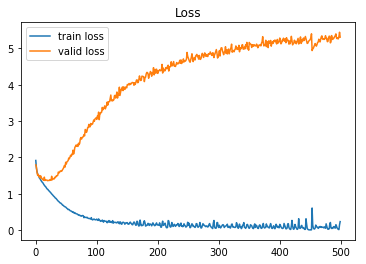

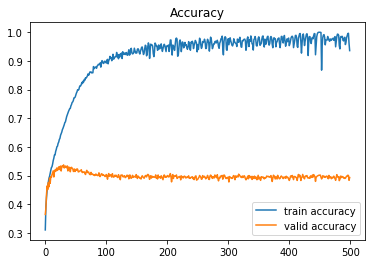

In [16]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# D77-2
* **請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢**

In [17]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 84us/step - loss: 2.2655 - acc: 0.1668 - val_loss: 2.2158 - val_acc: 0.2024
Epoch 2/100
50000/50000 [==============================] - 4s 86us/step - loss: 2.1861 - acc: 0.2200 - val_loss: 2.1577 - val_acc: 0.2379
Epoch 3/100
50000/50000 [==============================] - 4s 89us/step - loss: 2.1348 - acc: 0.2466 - val_loss: 2.1117 - val_acc: 0.2569
Epoch 4/100
50000/50000 [==============================] - 4s 85us/step - loss: 2.0924 - acc: 0.2642 - val_loss: 2.0741 - val_acc: 0.2735
Epoch 5/100
50000/50000 [==============================] - 4s 86us/step - loss: 2.0560 - acc: 0.2814 - val_loss: 2.0383 - val_acc: 0.2885
Epoch 6/100
50000/50000 [==============================] - 4s 86us/step - loss: 2.0240 - acc: 0.2924 - val_loss: 2.0090 - val_acc: 0.3009
Epoch 7/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.9966 - acc: 0.3033 - val_loss: 1.9840 - 

50000/50000 [==============================] - 4s 78us/step - loss: 1.6475 - acc: 0.4280 - val_loss: 1.6550 - val_acc: 0.4237
Epoch 60/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.6445 - acc: 0.4301 - val_loss: 1.6527 - val_acc: 0.4297
Epoch 61/100
50000/50000 [==============================] - 5s 101us/step - loss: 1.6416 - acc: 0.4301 - val_loss: 1.6509 - val_acc: 0.4294
Epoch 62/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.6385 - acc: 0.4308 - val_loss: 1.6479 - val_acc: 0.4296
Epoch 63/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.6356 - acc: 0.4323 - val_loss: 1.6445 - val_acc: 0.4293
Epoch 64/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.6329 - acc: 0.4341 - val_loss: 1.6406 - val_acc: 0.4315
Epoch 65/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.6298 - acc: 0.4343 - val_loss: 1.6382 - val_acc: 0.4313
Epoch 66/100
50000/50000 [=============

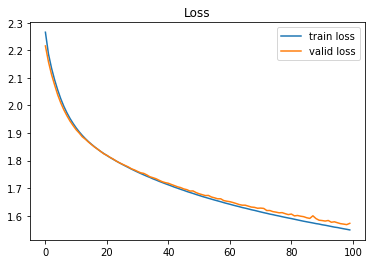

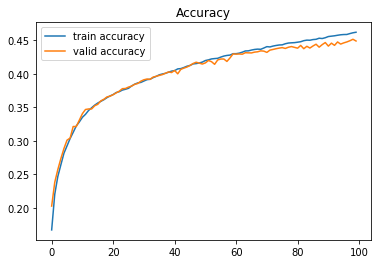

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()